In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sys

from scipy import constants as const
from scipy.optimize import fsolve
from time import time
from scipy.stats import norm

In [2]:
# reverse these colormaps so that it goes from light to dark

REVERSE_CMAP = ['summer', 'autumn', 'winter', 'spring', 'copper']

# clip some colormaps so the colors aren't too light

CMAP_RANGE = dict(gray={'start':200, 'stop':0},
                  Blues={'start':60, 'stop':255},
                  Oranges={'start':100, 'stop':255},
                  OrRd={'start':60, 'stop':255},
                  BuGn={'start':60, 'stop':255},
                  PuRd={'start':60, 'stop':255},
                  YlGn={'start':60, 'stop':255},
                  YlGnBu={'start':60, 'stop':255},
                  YlOrBr={'start':60, 'stop':255},
                  YlOrRd={'start':60, 'stop':255},
                  hot={'start':230, 'stop':0},
                  bone={'start':200, 'stop':0},
                  pink={'start':160, 'stop':0})

def cmap_intervals(length=50, cmap='YlOrBr', start=None, stop=None):
    """
    Return evenly spaced intervals of a given colormap `cmap`.
    Colormaps listed in REVERSE_CMAP will be cycled in reverse order.
    Certain colormaps have pre-specified color ranges in CMAP_RANGE. These module
    variables ensure that colors cycle from light to dark and light colors are
    not too close to white.
    :param length: int the number of colors used before cycling back to first color. When
    length is large (> ~10), it is difficult to distinguish between
    successive lines because successive colors are very similar.
    :param cmap: str name of a matplotlib colormap (see matplotlib.pyplot.cm)
    """
    cm = getattr(plt.cm, cmap)

    # qualitative color maps
    if cmap in  ['Accent', 'Dark2', 'Paired', 'Pastel1',
                             'Pastel2', 'Set1', 'Set2', 'Set3', 'Vega10',
                             'Vega20', 'Vega20b', 'Vega20c']:


        base_n_colors = cm.N

        cmap_list = cm(range(base_n_colors))

        if base_n_colors < length:


            factor = int(np.floor_divide(length,base_n_colors))


            cmap_list = np.tile(cmap_list,(factor,1))


        return cmap_list


    crange = CMAP_RANGE.get(cmap, dict(start=0, stop=255))
    if cmap in REVERSE_CMAP:
        crange = dict(start=crange['stop'], stop=crange['start'])
    if start is not None:
        crange['start'] = start
    if stop is not None:
        crange['stop'] = stop


    idx = np.linspace(crange['start'], crange['stop'], length).astype(np.int)
    return cm(idx)

def stack_plot(x_values,*y_values,**kwargs):
    """
    Creates a stack plot of histograms
    :param x_values: the x range
    :param y_values: the y values of each plots
    :param scale: (optional) the scale * max y to separate the plots (default 0.5)
    :param x_scale: (optional) the x scaling 
    :param x_label: (optional) the x label
    :param cmap: (optional) the cmap for the scales
    :param line_color: (optional) the line color above the plot
    """
    
    _default_kwargs={'scale':0.5,
                     'x_scale':'linear',
                     'x_label':'x',
                     'cmap': 'viridis',
                     'line_color':None,
                    
                    }
    
    
    for k,v in _default_kwargs.iteritems():
        
        
        if k in kwargs:
            
            _default_kwargs[k] = kwargs.pop(k)
    
    
    
    fig, ax = plt.subplots(figsize = (15,15))
    
    n_lines = len(y_values)
    
    
    #colors = cmap_intervals(n_lines, _default_kwargs['cmap'])
     #['saddlebrown',
    lcolor = ['saddlebrown','royalblue','limegreen','goldenrod','tomato','purple','orange','grey','black']
    
    max_y = np.max(map(np.max,y_values))
    
    delta_y = _default_kwargs['scale'] * max_y
    
    y_addition = 0.
    
    zorder = -10.
    
    for i,y in enumerate(y_values):
        
        idx = y>0.
        
        
        ax.fill_between(x_values[idx],
                        y_addition,
                        y_addition + y[idx],
                        zorder=zorder,
                        color=lcolor[i],
                        **kwargs)
        
        if _default_kwargs['line_color'] is None:
            
            color = lcolor[i]
            
        else:
            
            color = _default_kwargs['line_color']
            
        ax.plot(x_values[idx],y_addition + y[idx],
                color=color,
                lw=1.2,
                zorder=zorder, label = labellist[i])
            
        
        y_addition += delta_y
        zorder-=1
        
    ax.set_xscale(_default_kwargs['x_scale'])
    ax.set_xlabel(_default_kwargs['x_label'],fontsize  = 20)
    
    #ax.set_xticks(np.arange(60,79,1))
    ax.set_yticks([])
    
    return fig

<a list of 200 Patch objects>


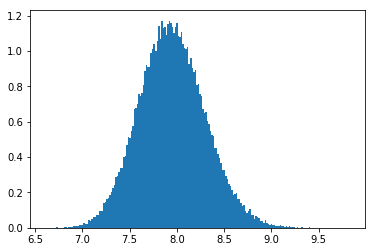

In [10]:
M1view = np.loadtxt("M1resnewcomb.txt")
#M1view2 = np.loadtxt("M1resnew2.txt")
#M1view = np.append(M1view2,M1view1)
c,b,bi = plt.hist(M1view,bins = 200,density = True)
print bi

7.9513469031454385 0.3496756867921378


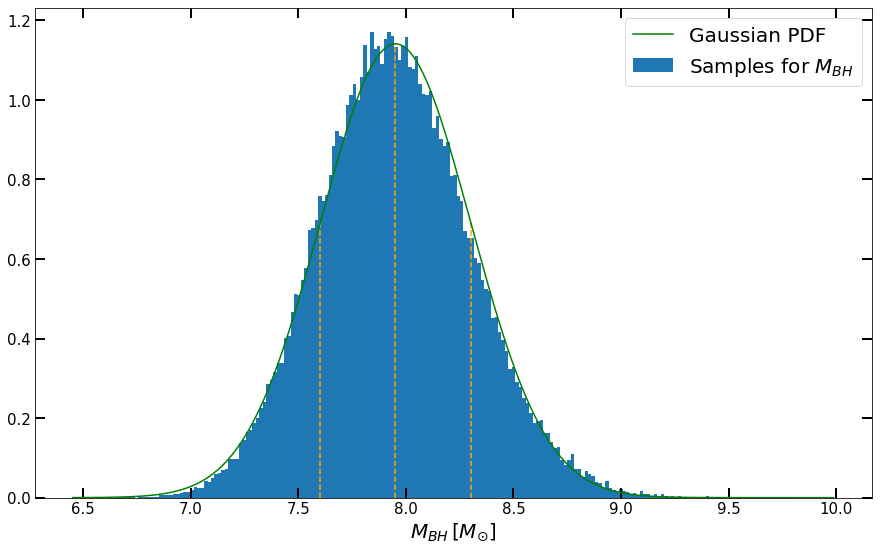

In [107]:
def scp(x,mu,std):
    #return np.size(M1view)*(b[1]-b[0])*norm.pdf(x,mu,std)
    return norm.pdf(x,mu,std)

mu1,std1= norm.fit(M1view)
print mu1, std1
plt.figure(figsize = (15,9))
plt.hist(M1view,bins = 200,label = r"Samples for $M_{BH}$",density = True)
xmin,xmax = plt.xlim()
x = np.linspace(xmin,xmax,1000)
#p = np.size(M1res)*0.074120839*norm.pdf(x,mu,std)
p = scp(x,mu1,std1)
plt.plot([mu1,mu1],[0,scp(mu1,mu1,std1)],"--",c = "orange")
plt.plot([mu1-std1,mu1-std1],[0,scp(mu1-std1,mu1,std1)],"--",c = "orange")
plt.plot([mu1+std1,mu1+std1],[0,scp(mu1+std1,mu1,std1)],"--",c = "orange")
plt.xlabel(r"$M_{BH}\, [M_{\odot}]$",fontsize = 20)
plt.plot(x,p,label = "Gaussian PDF",color  ="green")
plt.legend(fontsize = 20)
plt.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 15,length = 10, width = 2)
#plt.savefig("Plots/Massresnew.pdf")
plt.show()

In [5]:
from threeML.random_variates import RandomVariates


WARNING UserWarning: Using default configuration from /home/simonste/.venv/3ml/local/lib/python2.7/site-packages/threeML-0.4.946-py2.7.egg/threeML/data/threeML_config.yml. You might want to copy it to /home/simonste/.threeML/threeML_config.yml to customize it and avoid this warning.


WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



In [11]:
rv = RandomVariates(M1view)
rv.highest_posterior_density_interval(cl=0.95)[0]

7.272692466764719

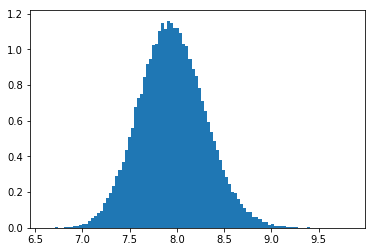

In [12]:
c,b,bi = plt.hist(M1view,bins = 100,density = True)

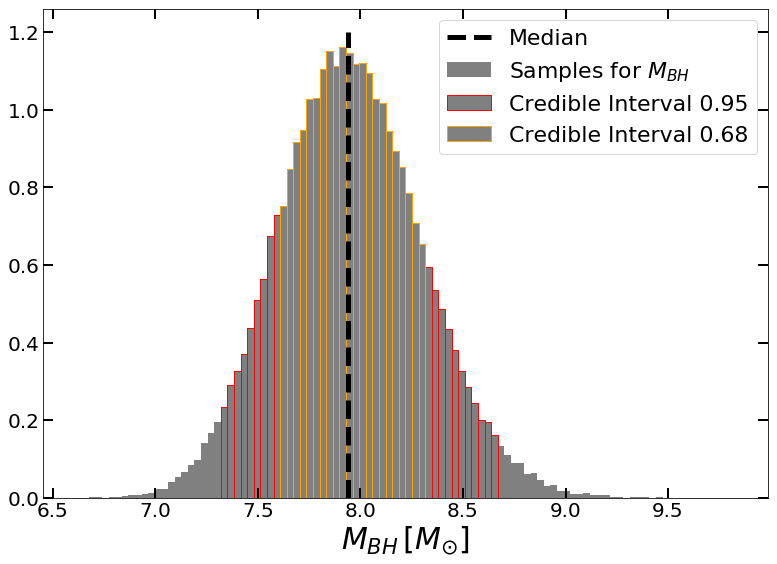

In [17]:
plt.figure(figsize = (13,9))
plt.bar(b[:-1],c,width = (b[1]-b[0]),align ="edge",color = "gray",label = r"Samples for $M_{BH}$")
barcred = np.array([])
ccred = np.array([])
cint = rv.equal_tail_interval(cl=0.68)
for i in range(100):
    
    if b[i] > cint[0] and b[i] < cint[1]:
        barcred = np.append(barcred,b[i])
        ccred = np.append(ccred,c[i]) 
barcred2 = np.array([])
ccred2 = np.array([])
cint2 = rv.equal_tail_interval(cl=0.95)
for i in range(100):
    
    if b[i] > cint2[0] and b[i] < cint2[1]:
        barcred2 = np.append(barcred2,b[i])
        ccred2 = np.append(ccred2,c[i])

plt.bar(barcred2,ccred2,width = (b[1]-b[0]),align ="edge",edgecolor ="red",facecolor = "gray",label = "Credible Interval 0.95")
plt.bar(barcred,ccred,width = (b[1]-b[0]),align ="edge",edgecolor ="orange",facecolor = "gray",label = "Credible Interval 0.68")
#plt.hist(M1view,bins = 200,label = r"Samples for $M_{BH}$",density = True)
plt.plot([rv.median,rv.median],[0,1.2],"--",c = "black",lw = 5,label = "Median")
#plt.plot([rv.highest_posterior_density_interval(cl=0.95)[0],rv.highest_posterior_density_interval(cl=0.95)[0]],[0,1.2],"--",c = "orange")
#plt.plot([rv.highest_posterior_density_interval(cl=0.95)[1],rv.highest_posterior_density_interval(cl=0.95)[1]],[0,1.2],"--",c = "orange")

plt.xlabel(r"$M_{BH}\, [M_{\odot}]$",fontsize = 30)
plt.legend(fontsize = 22)
plt.tick_params(axis = 'both',direction = 'in',top = True, right = True,labelsize = 20,length = 10, width = 2)
plt.savefig("Plots/MassBHCL.pdf")
plt.show()

In [111]:
M1g = np.loadtxt("M1resgbandmn.txt")
M1r = np.loadtxt("M1resrbandmn.txt")
M1i = np.loadtxt("M1resibandmn.txt")
M1z = np.loadtxt("M1reszbandmn.txt")
M1J = np.loadtxt("M1resJbandmn.txt")
M1H = np.loadtxt("M1resHbandmn.txt")
M1K = np.loadtxt("M1resKbandmn.txt")
M1em = np.loadtxt("M1resem0102.txt")
M1rin = np.loadtxt("M1resnewcomb.txt")

bins = np.linspace(6,11,100)

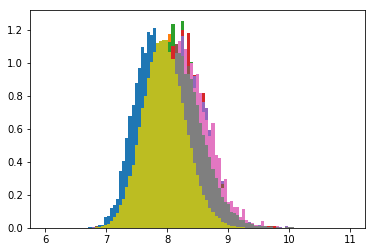

In [112]:
cg,bg,bag = plt.hist(M1g,bins = bins,density=True)
cr,bg,bag = plt.hist(M1r,bins = bins,density=True)
ci,bg,bag = plt.hist(M1i,bins = bins,density=True)
cz,bg,bag = plt.hist(M1z,bins = bins,density=True)
cJ,bg,bag = plt.hist(M1J,bins = bins,density=True)
cH,bg,bag = plt.hist(M1H,bins = bins,density=True)
cK,bg,bag = plt.hist(M1K,bins = bins,density=True)
cem,bg,bag = plt.hist(M1em,bins = bins,density=True)
cRin,bg,bag = plt.hist(M1rin,bins = bins,density=True)

In [191]:
from scipy import stats

In [196]:
M1gkde = stats.gaussian_kde(M1g)
M1gkde(bins)

array([1.58244556e-035, 3.21415584e-031, 3.20305376e-027, 1.56629911e-023,
       3.75886818e-020, 4.42771997e-017, 2.56056180e-014, 7.27220600e-012,
       1.01493358e-009, 6.96938389e-008, 2.36118724e-006, 3.97145945e-005,
       3.36422596e-004, 1.48390365e-003, 3.68089931e-003, 6.08049425e-003,
       8.93415758e-003, 1.47100001e-002, 2.63078536e-002, 4.47113711e-002,
       6.78686536e-002, 9.63078161e-002, 1.33447573e-001, 1.87317959e-001,
       2.69001676e-001, 3.71816263e-001, 4.84982793e-001, 6.01683910e-001,
       7.13394619e-001, 8.19260030e-001, 9.18138443e-001, 1.00531597e+000,
       1.07412812e+000, 1.12539102e+000, 1.15888832e+000, 1.16407997e+000,
       1.13642442e+000, 1.09236132e+000, 1.04124136e+000, 9.79340209e-001,
       9.06562414e-001, 8.18786786e-001, 7.09763700e-001, 5.97145412e-001,
       4.96921110e-001, 4.05390221e-001, 3.21789848e-001, 2.50089243e-001,
       1.94476030e-001, 1.51938165e-001, 1.17392658e-001, 8.97804955e-002,
       6.54952394e-002, 4

<BarContainer object of 100 artists>

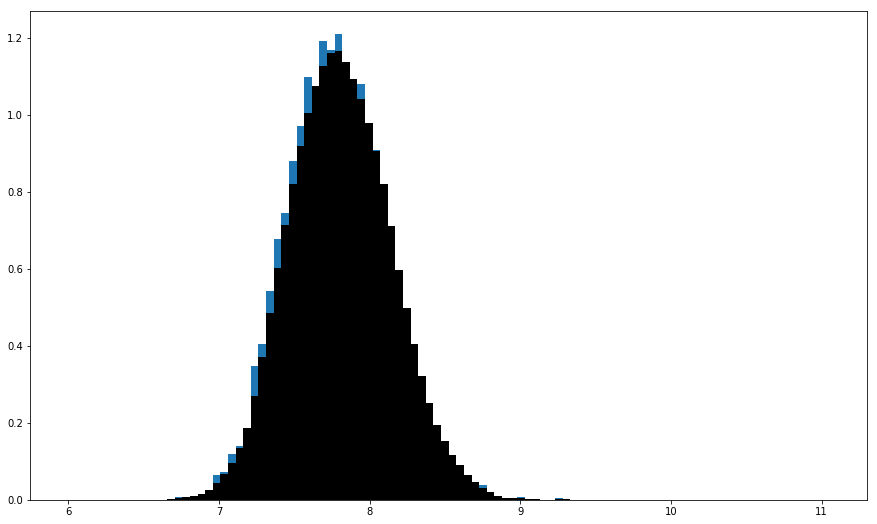

In [203]:
plt.figure(figsize = (15,9))
plt.hist(M1g,bins = bins,density=True)
plt.bar(bins,M1gkde(bins),width = (bins[1]-bins[0]),align ="edge",color = "black")



In [198]:
labellist = ['emcee sec. 7.7.1', 'MULTINEST g band', 'MULTINEST r band', 'MULTINEST i band', 'MULTINEST z band', 'MULTINEST J band', 'MULTINEST H band', 'MULTINEST K band',r'emcee with $R_{in}$ incl.']

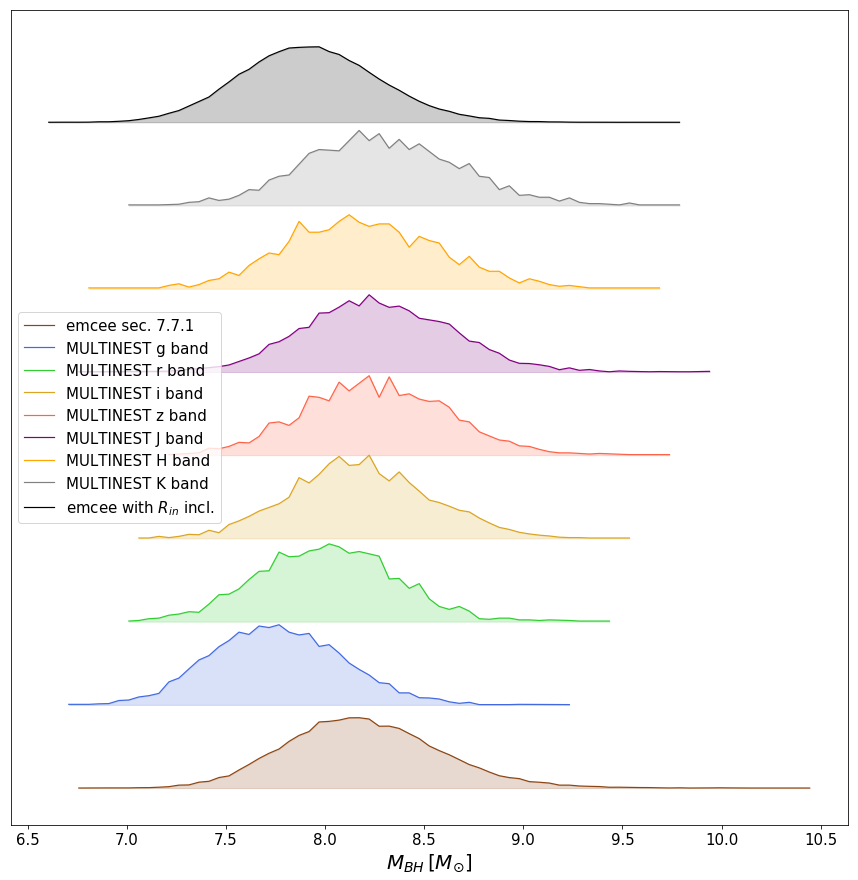

In [199]:
figu = stack_plot(bins[:99] , cem,cg,cr,ci,cz,cJ,cH,cK,cRin,scale = 1.,x_label = r"$M_{BH}\, [M_{\odot}]$",alpha = 0.2);
figu.axes[0].legend(fontsize = 15 ,loc = 6)
plt.xticks(fontsize = 15)
plt.savefig("Plots/fancyMBH.pdf")

In [185]:
from threeML.io.uncertainty_formatter import uncertainty_formatter
for j,i in enumerate([M1em,M1g,M1r,M1i,M1z,M1J,M1H,M1K,M1rin]):
    rv = RandomVariates(i)
    minb,maxb = rv.equal_tail_interval(0.68)
    hdps = uncertainty_formatter (rv.median,minb,maxb)
    minb,maxb = rv.equal_tail_interval(0.95)
    hdps95 = uncertainty_formatter (rv.median,minb,maxb)
    print labellist[j]+" & $"+ hdps + "$ & $"+ hdps95 +r"$ \\"
    
    

emcee sec. 7.7.1 & $8.200 +/- 0.4$ & $8.2 -0.7 +0.8$ \\
MULTINEST g band & $7.77 -0.32 +0.34$ & $7.8 -0.6 +0.7$ \\
MULTINEST r band & $8.04 -0.35 +0.34$ & $8.000 +/- 0.7$ \\
MULTINEST i band & $8.19 -0.33 +0.4$ & $8.200 +/- 0.7$ \\
MULTINEST z band & $8.26 -0.34 +0.4$ & $8.300 +/- 0.7$ \\
MULTINEST J band & $8.300 +/- 0.4$ & $8.3 -0.7 +0.8$ \\
MULTINEST H band & $8.200 +/- 0.4$ & $8.2 -0.7 +0.8$ \\
MULTINEST K band & $8.300 +/- 0.4$ & $8.3 -0.7 +0.8$ \\
emcee with $R_{in}$ incl. & $7.94 -0.34 +0.4$ & $7.9 -0.6 +0.7$ \\
